In [16]:
#importing required libraries
import scipy
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, scale
from sklearn.model_selection import train_test_split
from sklearn import metrics as sm
import sys
print('Python: {}'.format(sys.version))

Python: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]


In [17]:
data = pd.read_csv('D:/Data Sci/Python/python_script/Portfolio Projects/Regression/accidents_2017.csv')
data.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


In [18]:
data.shape
data.isna().sum()

Id                   0
District Name        0
Neighborhood Name    0
Street               0
Weekday              0
Month                0
Day                  0
Hour                 0
Part of the day      0
Mild injuries        0
Serious injuries     0
Victims              0
Vehicles involved    0
Longitude            0
Latitude             0
dtype: int64

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [20]:
#Visualization

ax = data.groupby(['Weekday','Part of the day'])['Mild injuries'].last()
ax

Weekday    Part of the day
Friday     Afternoon          1
           Morning            2
           Night              4
Monday     Afternoon          1
           Morning            1
           Night              1
Saturday   Afternoon          0
           Morning            1
           Night              1
Sunday     Afternoon          0
           Morning            2
           Night              2
Thursday   Afternoon          1
           Morning            1
           Night              1
Tuesday    Afternoon          2
           Morning            1
           Night              0
Wednesday  Afternoon          2
           Morning            1
           Night              0
Name: Mild injuries, dtype: int64

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


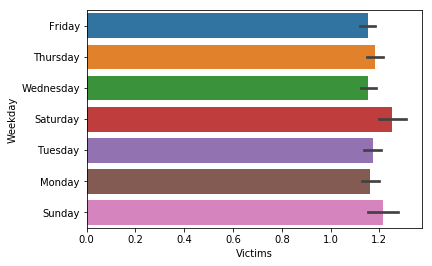

In [21]:
ax = sns.barplot(x = 'Victims', y = 'Weekday', data = data)

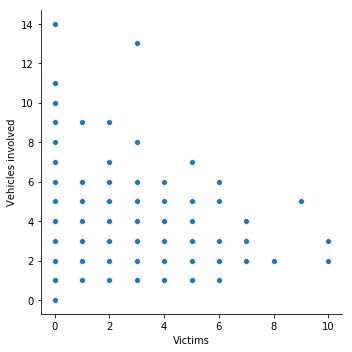

In [22]:
sns.relplot(x = 'Victims', y = 'Vehicles involved', data = data)

In [23]:
dist_cnt = data['District Name'].value_counts()
dist_cnt

Eixample               3029
Sant Martí             1336
Sants-Montjuïc         1104
Sarrià-Sant Gervasi    1104
Horta-Guinardó          743
Les Corts               726
Ciutat Vella            600
Sant Andreu             597
Nou Barris              542
Gràcia                  531
Unknown                  27
Name: District Name, dtype: int64

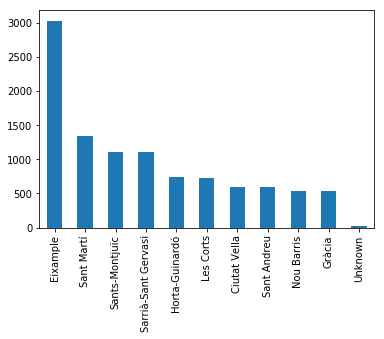

In [24]:
dist_cnt.plot(kind = 'bar')

District Name
Ciutat Vella           AxesSubplot(0.125,0.125;0.775x0.755)
Eixample               AxesSubplot(0.125,0.125;0.775x0.755)
Gràcia                 AxesSubplot(0.125,0.125;0.775x0.755)
Horta-Guinardó         AxesSubplot(0.125,0.125;0.775x0.755)
Les Corts              AxesSubplot(0.125,0.125;0.775x0.755)
Nou Barris             AxesSubplot(0.125,0.125;0.775x0.755)
Sant Andreu            AxesSubplot(0.125,0.125;0.775x0.755)
Sant Martí             AxesSubplot(0.125,0.125;0.775x0.755)
Sants-Montjuïc         AxesSubplot(0.125,0.125;0.775x0.755)
Sarrià-Sant Gervasi    AxesSubplot(0.125,0.125;0.775x0.755)
Unknown                AxesSubplot(0.125,0.125;0.775x0.755)
Name: Victims, dtype: object

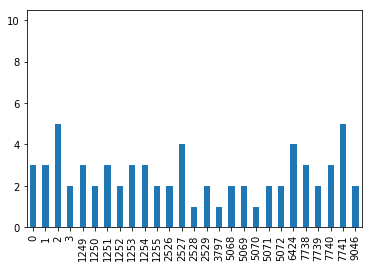

In [25]:
et = data.groupby(['District Name'])['Victims']
et.plot(kind = 'bar')

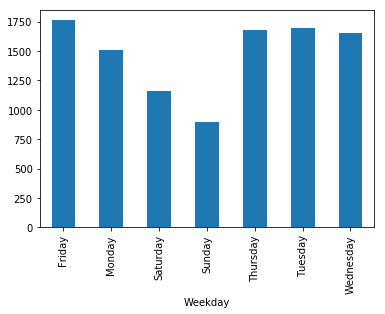

In [11]:
day=data.groupby(["Weekday"])["Victims"].count()
day.column=['Weekday', 'Victims']
day.plot(kind="bar")

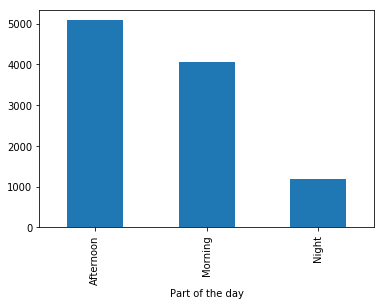

In [26]:
day=data.groupby(["Part of the day"])["Victims"].count()
day.column=['Part of the day', 'Victims']
day.plot(kind="bar")

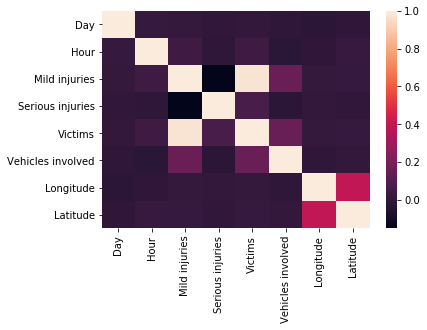

In [27]:
sns.heatmap(data.corr())

In [28]:
np.random.seed(42)
import numpy as np
import numpy.random as rnd


def split_train_test(data, test_ratio):
    shuffled_indices = rnd.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [29]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set), "train +" , len(test_set), "test" )

8272 train + 2067 test


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #split data
from sklearn.preprocessing import scale
from sklearn import metrics as sm

# my_X = df.drop(['Vehicles involved'], axis=1)
# my_Y = df['Vehicles involved'].values.reshape(-1,1)
my_X = df[['Month', 'Hour', 'Serious injuries', 'Victims', 'Crossing']]
my_Y = df['Vehicles involved'].values.reshape(-1,1)
cer_s = scale(my_X)
cer_train, cer_test, tar_train, tar_test = train_test_split(cer_s, my_Y,
                                                           test_size = 0.25,
                                                           random_state = 25) #try 15 and check accuracy, 25 is best gives 90%+

linR = LinearRegression(normalize = True).fit(cer_train, tar_train)
# linR = LinearRegression().fit(cer_train, tar_train)
pred = linR.predict(cer_test)
print(linR.score(cer_test, tar_test))
#acc = sm.accuracy_score(tar_test, pred)
#print("****Linear Reg = ", acc)
#print(sm.classification_report(tar_test,pred))